C:\Users\Pavan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


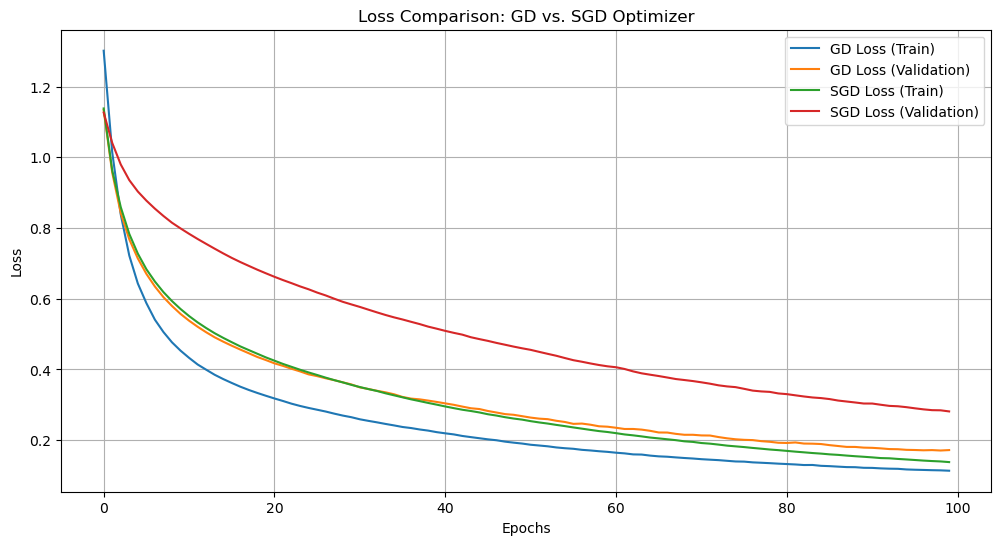

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_gd = Sequential()
model_gd.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_gd.add(Dense(y_train.shape[1], activation='softmax'))
model_gd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
history_gd = model_gd.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0, validation_split=0.1)
model_sgd = Sequential()
model_sgd.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_sgd.add(Dense(y_train.shape[1], activation='softmax'))
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0, validation_split=0.1)

plt.figure(figsize=(12, 6))
plt.plot(history_gd.history['loss'], label='GD Loss (Train)')
plt.plot(history_gd.history['val_loss'], label='GD Loss (Validation)')
plt.plot(history_sgd.history['loss'], label='SGD Loss (Train)')
plt.plot(history_sgd.history['val_loss'], label='SGD Loss (Validation)')
plt.title('Loss Comparison: GD vs. SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()